In [1]:
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw

from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes

from mrcnn.utils import Dataset
from matplotlib import pyplot as plt

from mrcnn.config import Config
from mrcnn.model import MaskRCNN


from mrcnn import model as modellib, utils

Using TensorFlow backend.


In [2]:
###################################################
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
from mrcnn.config import Config
from mrcnn.utils import compute_ap
from numpy import expand_dims
from numpy import mean
from matplotlib.patches import Rectangle


In [11]:
# define the prediction configuration
class PredictionConfig(Config):
	# define the name of the configuration
	NAME = "marble_cfg_coco_1"
	# number of classes (background + Blue Marbles + Non Blue marbles)
	NUM_CLASSES = 1 + 6
	# Set batch size to 1 since we'll be running inference on
            # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1

In [12]:
# calculate the mAP for a model on a given dataset
def evaluate_model(dataset, model, cfg):
	APs = list()
	for image_id in dataset.image_ids:
		# load image, bounding boxes and masks for the image id
		image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
		# convert pixel values (e.g. center)
		scaled_image = mold_image(image, cfg)
		# convert image into one sample
		sample = expand_dims(scaled_image, 0)
		# make prediction
		yhat = model.detect(sample, verbose=0)
		# extract results for first sample
		r = yhat[0]
		# calculate statistics, including AP
		AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
		# store
		APs.append(AP)
	# calculate the mean AP across all images
	mAP = mean(APs)
	return mAP

In [13]:
# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='C:/Users/judit/Downloads/coba/Mask-RCNN-TF2', config=cfg)
# load model weights
model.load_weights('mask_rcnn_model_cfg_coco_4_0040.h5', by_name=True)
# evaluate model on training dataset
# train_mAP = evaluate_model(dataset_train, model, cfg)
# print("Train mAP: %.3f" % train_mAP)
# # evaluate model on test dataset
# # test_mAP = evaluate_model(dataset_train, model, cfg)
# # print("Test mAP: %.3f" % test_mAP)

ValueError: Layer #391 (named "mrcnn_bbox_fc"), weight <tf.Variable 'mrcnn_bbox_fc_2/kernel:0' shape=(1024, 28) dtype=float32, numpy=
array([[-0.0473094 ,  0.01745938,  0.01866094, ...,  0.00955525,
        -0.00785425,  0.03107265],
       [-0.02195745, -0.01167849, -0.04781617, ...,  0.03033298,
        -0.01928491,  0.02127217],
       [-0.02573944, -0.07523974,  0.01702924, ...,  0.04169144,
        -0.06748892,  0.01572844],
       ...,
       [-0.01172963,  0.04949015,  0.04892798, ..., -0.04781446,
         0.01720337,  0.04252115],
       [ 0.03606691, -0.02180595, -0.06129535, ...,  0.05480984,
         0.028938  , -0.05354345],
       [ 0.00867134, -0.01585443,  0.0128185 , ...,  0.01284315,
        -0.01721653, -0.00486265]], dtype=float32)> has shape (1024, 28), but the saved weight has shape (1024, 24).

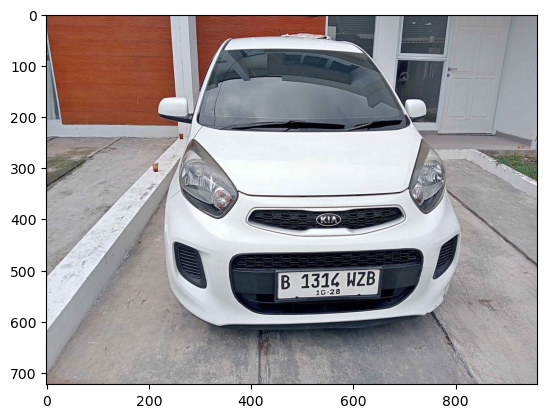

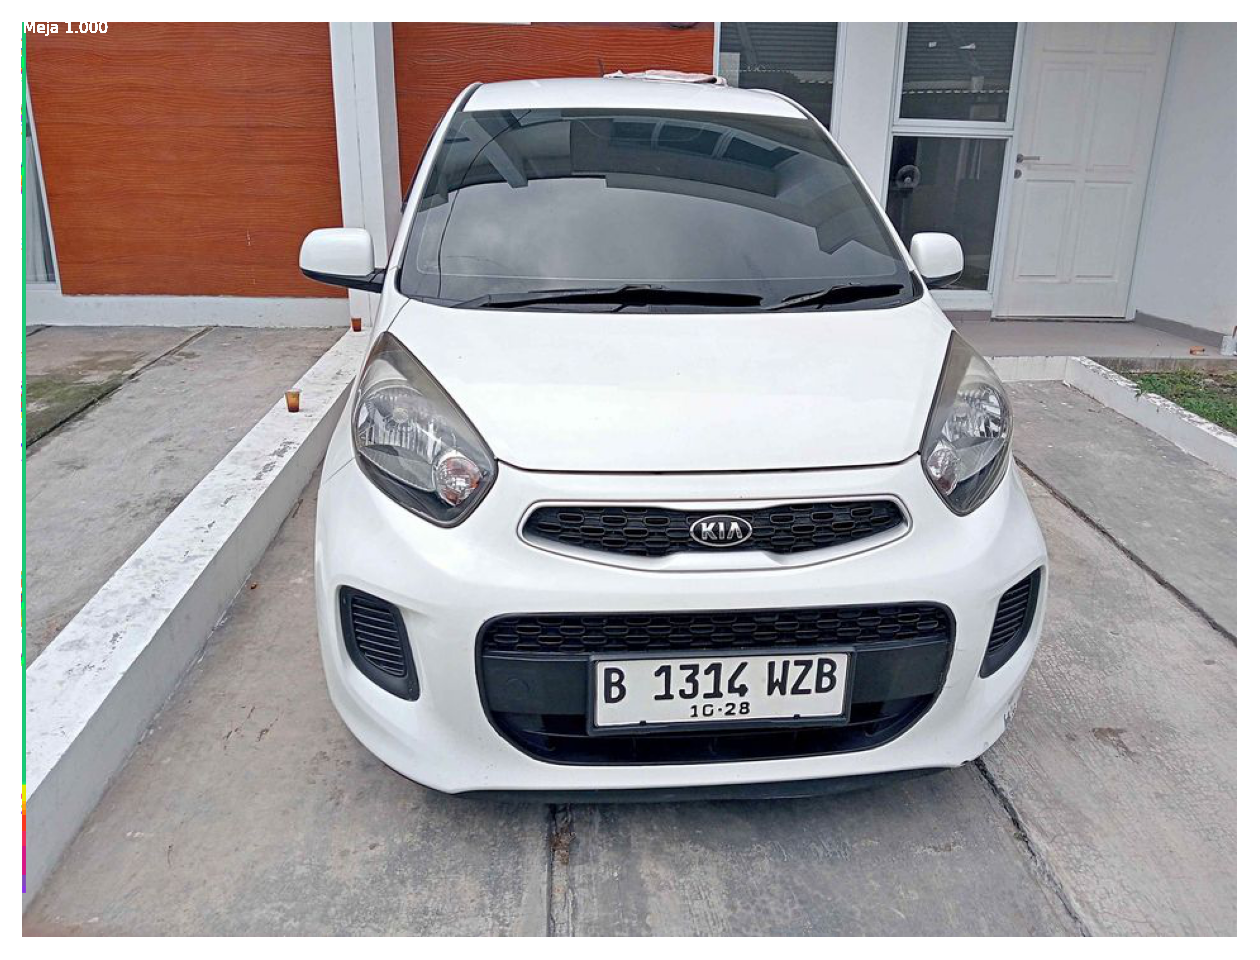

In [14]:
#Test on a single image
marbles_img = skimage.io.imread("C:/Users/judit/Downloads/coba/Mask-RCNN-TF2/test/56.jpg")
plt.imshow(marbles_img)

detected = model.detect([marbles_img])
results = detected[0]
class_names = ['BG', 'Topi', 'Pakaian', 'Meja','Cangkir', 'Rambut','car']
display_instances(marbles_img, results['rois'], results['masks'], 
                  results['class_ids'], class_names, results['scores'])